ggwrap
======
A thin wrapper to produce ggplot2 graphs from Python

## Requirements

- Python 3.5+
- `Rscript` command and the R environment with `ggplot2` package installed

## Functions
- `ggshow`: Draw graph using ggplot2 on R and return the Image object that you can show on Jupyter notebook
- `ggwrite`: Draw graph using ggplot2 on R and save it to a file.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ggwrap import ggshow, ggwrite

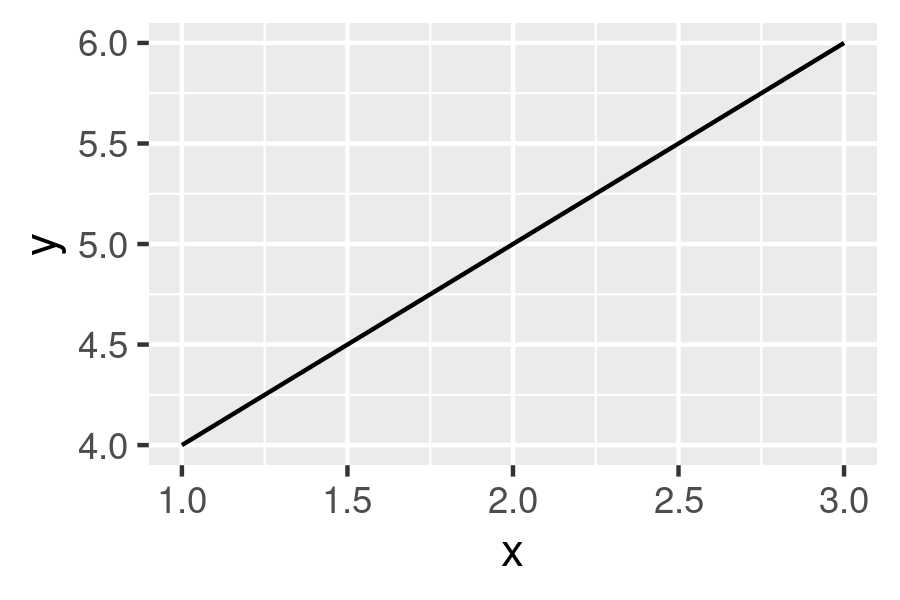

In [3]:
# Minimal example
# pass R code to produce ggplot graph to ggshow function
# note: ggplot2 is automatically imported
ggshow("""
  x <- c(1,2,3)
  y <- c(4,5,6)
  qplot(x, y, geom="line")
""", width=3, height=2)

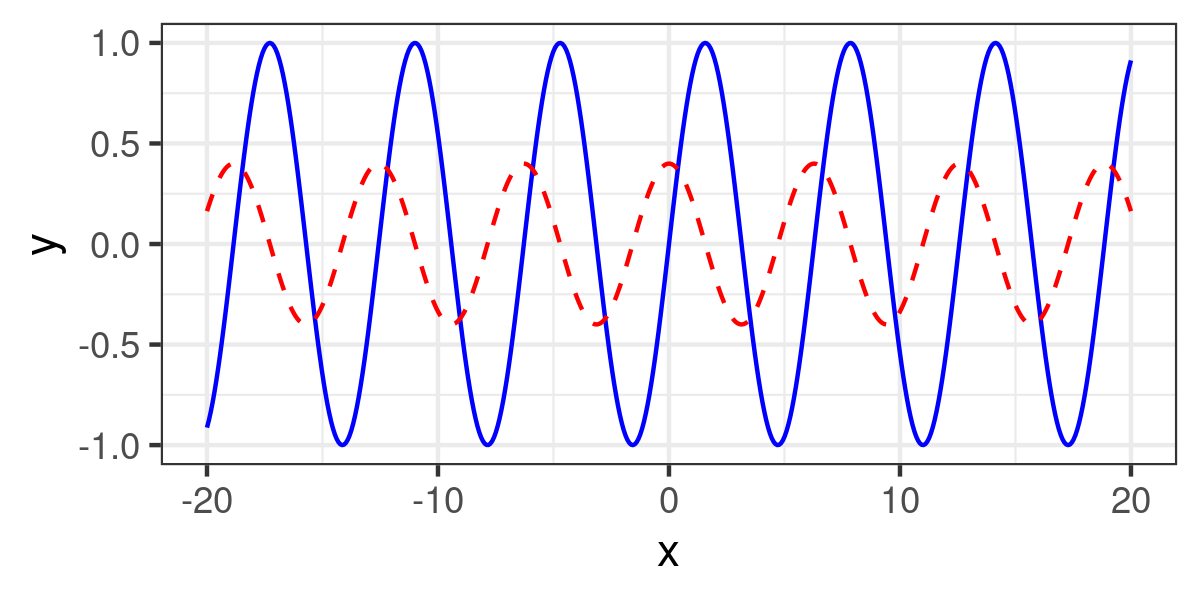

In [4]:
# Example with data frames
# pass as data frames as keyword arguments
# then you can use them in the R code
import numpy as np
import pandas as pd
x = np.linspace(-20, 20, 500)
y = np.sin(x)
y2 = 0.4*np.cos(x)

df1 = pd.DataFrame({"x":x, "y":y})
df2 = pd.DataFrame({"x":x, "y":y2})
ggshow("""
  ggplot(a, aes(x, y)) + 
    geom_line(color="blue") +
    geom_line(data=b, linetype="dashed", color="red") +
    theme_bw()
""", dispwidth=400, width=4, height=2, a=df1, b=df2)

In [5]:
# Example to save the graph to a file
ggwrite("""
    x <- c(1,2,3)
    y <- c(4,5,6)
    qplot(x, y, geom="line")
""", "foo.jpg", width=4, height=2)

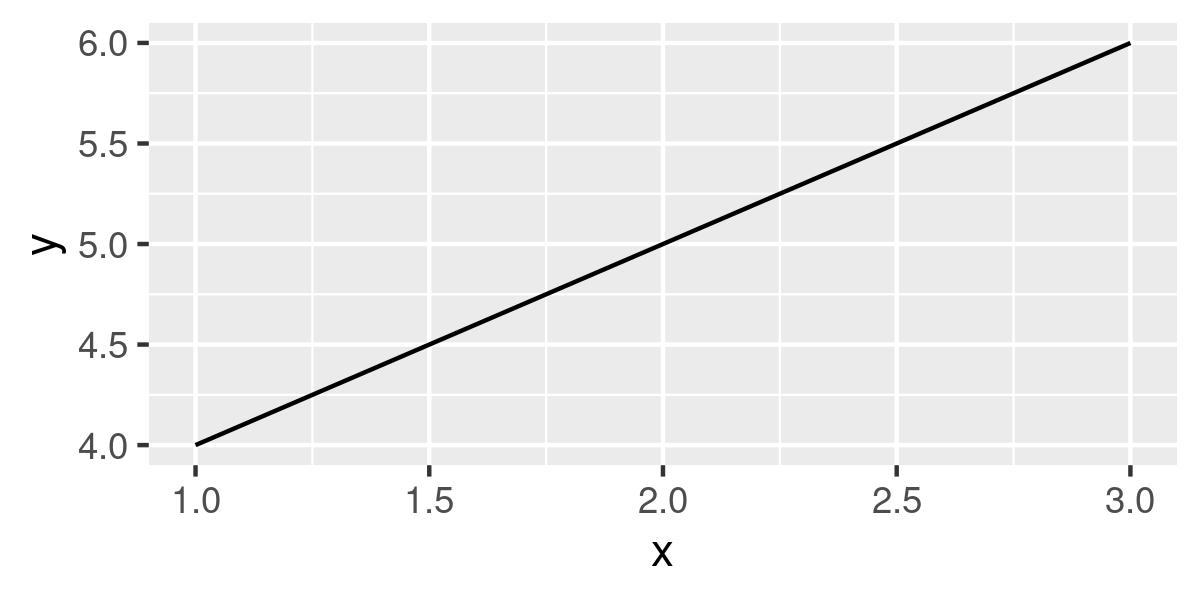

In [6]:
from IPython.display import Image
Image("foo.jpg", width=400)

In [7]:
# By default, we use 'Rscript' as the command to run R code.
# If this is not a valid command on your environment,
# specify by set_rscript function.
from ggwrap import config, set_rscript

set_rscript("/usr/bin/Rscript")  
print(config.rscript)
# this is just the full path of the command on this environment
# so the command will work in the same way

/usr/bin/Rscript
